<a href="https://colab.research.google.com/github/AntoninaRemizova/DA/blob/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0_%D0%A0%D0%98%D0%A1_23_3_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Загрузка данных

In [2]:
url_order = "https://raw.githubusercontent.com/AntoninaRemizova/DA/refs/heads/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0%20%D0%90%D0%BD%D1%82%D0%BE%D0%BD%D0%B8%D0%BD%D0%B0%20%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%BD%D0%B0%20order.csv"
df_order = pd.read_csv(url_order)
df_order.drop(columns= "Unnamed: 0", inplace = True)
df_order

,order_id,date,time
0,2,2015-01-01,11:57:40
1,3,2015-01-01,12:12:28
2,5,2015-01-01,12:21:30
3,6,2015-01-01,12:29:36
4,8,2015-01-01,12:51:37
...,...,...,...
12210,21342,2015-12-31,20:02:57
12211,21343,2015-12-31,20:27:23
12212,21344,2015-12-31,20:43:46
12213,21346,2015-12-31,20:51:07


In [3]:
url_details = "https://raw.githubusercontent.com/AntoninaRemizova/DA/refs/heads/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0%20%D0%90%D0%BD%D1%82%D0%BE%D0%BD%D0%B8%D0%BD%D0%B0%20%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%BD%D0%B0%20order_details.csv"
df_details = pd.read_csv(url_details)
df_details.drop(columns= "Unnamed: 0", inplace = True)
df_details

,order_details_id,order_id,pizza_id,quantity
0,2,2,classic_dlx_m,1
1,3,2,five_cheese_l,1
2,4,2,ital_supr_l,1
3,5,2,mexicana_m,1
4,6,2,thai_ckn_l,1
...,...,...,...,...
27881,48608,21346,big_meat_s,1
27882,48609,21346,cali_ckn_m,1
27883,48610,21346,cali_ckn_s,1
27884,48611,21346,soppressata_l,1


# Задача 1

In [4]:
df_full = pd.merge(df_order, df_details, on = 'order_id')
df_full

,order_id,date,time,order_details_id,pizza_id,quantity
0,2,2015-01-01,11:57:40,2,classic_dlx_m,1
1,2,2015-01-01,11:57:40,3,five_cheese_l,1
2,2,2015-01-01,11:57:40,4,ital_supr_l,1
3,2,2015-01-01,11:57:40,5,mexicana_m,1
4,2,2015-01-01,11:57:40,6,thai_ckn_l,1
...,...,...,...,...,...,...
27881,21346,2015-12-31,20:51:07,48608,big_meat_s,1
27882,21346,2015-12-31,20:51:07,48609,cali_ckn_m,1
27883,21346,2015-12-31,20:51:07,48610,cali_ckn_s,1
27884,21346,2015-12-31,20:51:07,48611,soppressata_l,1


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27886 entries, 0 to 27885
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          27886 non-null  int64 
 1   date              27886 non-null  object
 2   time              27886 non-null  object
 3   order_details_id  27886 non-null  int64 
 4   pizza_id          27886 non-null  object
 5   quantity          27886 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


## Вопрос 1

In [6]:
print(df_full.loc[234]['quantity'])

1


# Задача 2

In [7]:
new_data = df_full['pizza_id'].str.rsplit('_', n = 1, expand=True)
new_data.columns = ['pizza_type', 'pizza_size']
df_full = pd.concat([df_full, new_data], axis=1)
df_full.drop(columns = 'pizza_id', inplace = True)
df_full.head()

,order_id,date,time,order_details_id,quantity,pizza_type,pizza_size
0,2,2015-01-01,11:57:40,2,1,classic_dlx,m
1,2,2015-01-01,11:57:40,3,1,five_cheese,l
2,2,2015-01-01,11:57:40,4,1,ital_supr,l
3,2,2015-01-01,11:57:40,5,1,mexicana,m
4,2,2015-01-01,11:57:40,6,1,thai_ckn,l


## Вопрос 2

In [8]:
print(df_full[df_full['order_id'] == 87].iloc[1]['pizza_size'])

m


## Вопрос 3

In [9]:
print(df_full[df_full['order_id'] == 87].iloc[0]['pizza_type'])

ital_cpcllo


## Вопрос 4

In [10]:
print(df_full['pizza_size'].value_counts().sort_values())

pizza_size
xxl       16
xl       323
s       8030
m       8764
l      10753
Name: count, dtype: int64


## Вопрос 5

In [11]:
print(df_full['pizza_type'].value_counts().sort_values())

pizza_type
brie_carre       286
spinach_supr     526
ckn_pesto        533
soppressata      541
calabrese        543
spin_pesto       544
mediterraneo     547
ckn_alfredo      569
ital_veggie      585
green_garden     606
pep_msh_pep      751
five_cheese      784
peppr_salami     801
the_greek        809
ital_cpcllo      810
napolitana       821
spinach_fet      822
veggie_veg       828
prsc_argla       845
mexicana         896
big_meat        1025
southw_ckn      1051
spicy_ital      1066
ital_supr       1067
sicilian        1067
four_cheese     1069
thai_ckn        1315
cali_ckn        1330
hawaiian        1339
pepperoni       1346
bbq_ckn         1370
classic_dlx     1394
Name: count, dtype: int64


# Задача 3

In [12]:
total_quantity = df_full.groupby('order_id').agg(total_pizzas=('quantity', 'sum')).reset_index()
print(f"Среднее: {total_quantity['total_pizzas'].mean()}")
print(f"Медиана: {total_quantity['total_pizzas'].median()}")
print(f"Max: {total_quantity['total_pizzas'].max()}")

Среднее: 2.3264019647973804
Медиана: 2.0
Max: 28


## Вопрос 6

Типичный заказ содержит 2 пиццы. Однако, среднее количество пицц немного выше медианного, а максимальное число пицц в заказе превышает медиану в 14 раз. Это говорит о том, что в выборке присутсвуют нехарактерно большие заказы, которые могут являться выбросами.

# Задача 4

In [13]:
total_quantity.head()

,order_id,total_pizzas
0,2,5
1,3,2
2,5,1
3,6,2
4,8,1


## Вопрос 7

In [14]:
q1 = np.quantile(total_quantity['total_pizzas'], 0.25)
q3 = np.quantile(total_quantity['total_pizzas'], 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = total_quantity[(total_quantity['total_pizzas'] < lower_bound) | (total_quantity['total_pizzas'] > upper_bound)]
print(len(outliers))

306


# Задача 5

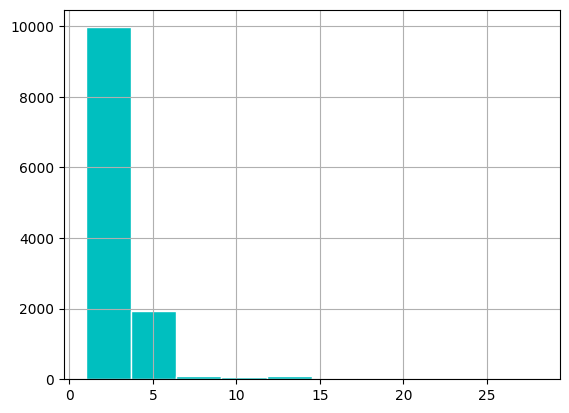

In [15]:
total_quantity["total_pizzas"].hist(
    color = "c",
    edgecolor = "w"
);

## Вопрос 8

Распределение не симметричное, скошено вправо

# Задача 6

In [16]:
pizzas_with_chicken = df_full[df_full['pizza_type'].str.contains('ckn')]
pizzas_with_chicken

,order_id,date,time,order_details_id,quantity,pizza_type,pizza_size
4,2,2015-01-01,11:57:40,6,1,thai_ckn,l
8,6,2015-01-01,12:29:36,11,1,bbq_ckn,s
11,11,2015-01-01,13:02:59,26,1,bbq_ckn,l
12,11,2015-01-01,13:02:59,27,1,cali_ckn,l
13,11,2015-01-01,13:02:59,28,1,cali_ckn,m
...,...,...,...,...,...,...,...
27860,21332,2015-12-31,19:06:29,48579,1,cali_ckn,s
27865,21337,2015-12-31,19:22:31,48589,1,cali_ckn,l
27871,21342,2015-12-31,20:02:57,48596,1,ckn_pesto,m
27882,21346,2015-12-31,20:51:07,48609,1,cali_ckn,m


## Вопрос 9

In [17]:
print(len(pizzas_with_chicken['order_id'].unique()))

4890


# Задача 7

In [18]:
df_full['datetime'] = pd.to_datetime(df_full['date'])
df_full.drop(columns = "date", inplace=True)
df_full['weekday'] = df_full['datetime'].dt.strftime("%A")
df_full.sample(10)

,order_id,time,order_details_id,quantity,pizza_type,pizza_size,datetime,weekday
82,53,18:54:17,128,1,pep_msh_pep,s,2015-01-01,Thursday
19270,14883,17:24:24,33710,1,classic_dlx,l,2015-09-06,Sunday
24391,18770,17:43:14,42680,1,southw_ckn,l,2015-11-16,Monday
6008,4559,13:26:03,10415,1,cali_ckn,l,2015-03-18,Wednesday
4859,3710,13:48:40,8469,1,cali_ckn,m,2015-03-04,Wednesday
20689,16001,12:56:37,36243,1,pepperoni,l,2015-09-27,Sunday
6842,5205,13:54:15,11856,1,mediterraneo,l,2015-03-29,Sunday
233,158,15:54:30,380,1,ital_veggie,m,2015-01-03,Saturday
1283,985,14:34:50,2220,1,soppressata,s,2015-01-17,Saturday
23151,17858,19:48:43,40538,1,green_garden,m,2015-10-31,Saturday


## Вопрос 10

In [19]:
orders_per_weekday = df_full.groupby('weekday')['order_id'].nunique().sort_values()
print(orders_per_weekday)

weekday
Sunday       1491
Monday       1591
Tuesday      1703
Wednesday    1715
Thursday     1834
Saturday     1862
Friday       2019
Name: order_id, dtype: int64


## Вопрос 11

In [20]:
orders_with_hawaiian = df_full[df_full['pizza_type'] == 'hawaiian'].groupby('weekday')['order_id'].nunique().sort_values()
print(orders_with_hawaiian)

weekday
Tuesday      151
Monday       162
Sunday       173
Wednesday    193
Saturday     197
Thursday     202
Friday       211
Name: order_id, dtype: int64


# Задача 8

In [21]:
df_full['weekend'] = df_full['weekday'].apply(lambda x: 1 if (x == "Saturday" or x == "Sunday") else 0)
df_full.sample(10)

,order_id,time,order_details_id,quantity,pizza_type,pizza_size,datetime,weekday,weekend
5409,4093,17:11:16,9347,1,five_cheese,l,2015-03-10,Tuesday,0
16957,13036,12:05:51,29508,1,peppr_salami,s,2015-08-06,Thursday,0
17089,13146,21:27:01,29754,1,hawaiian,s,2015-08-07,Friday,0
25273,19437,15:34:55,44215,1,sicilian,s,2015-11-27,Friday,0
19555,15090,21:30:59,34184,1,pepperoni,l,2015-09-09,Wednesday,0
4183,3216,18:51:30,7298,1,ital_veggie,s,2015-02-23,Monday,0
5020,3826,12:39:33,8727,1,calabrese,l,2015-03-06,Friday,0
27844,21319,18:07:19,48552,1,prsc_argla,m,2015-12-31,Thursday,0
5766,4370,15:29:07,9982,1,ital_cpcllo,m,2015-03-15,Sunday,1
6871,5223,16:59:08,11899,1,ckn_pesto,l,2015-03-29,Sunday,1


## Вопрос 12

In [22]:
orders_per_weekend = df_full[df_full['weekend'] == 1]['order_id'].nunique()
print(orders_per_weekend)

3353


## Вопрос 13

In [23]:
large_pizzas = df_full[df_full['pizza_size'].isin(['xl', 'xxl'])]
weekend_large = len(large_pizzas[large_pizzas['weekend'] == 1])
weekday_large = len(large_pizzas[large_pizzas['weekend'] == 0])
weekend_overall =  len(df_full[df_full['weekend'] == 1])
weekday_overall = len(df_full[df_full['weekend'] == 0])

stat, pvalue = proportions_ztest(count=[weekend_large, weekday_large],
                                nobs=[weekend_overall, weekday_overall],
                                alternative='two-sided')

print(f"{pvalue:.2f}")

0.86


## Вопрос 14

In [24]:
alpha = 0.05
if pvalue > alpha:
    print("H0 не отвергается")
else:
    print("H0 отвергается")

H0 не отвергается


## Вопрос 15

In [25]:
weekday_top = df_full[df_full['weekend'] == 0]['pizza_type'].value_counts().head(3)
weekend_top = df_full[df_full['weekend'] == 1]['pizza_type'].value_counts().head(3)

print("\nТри самых популярных типа (начинки) пиццы в будни:")
print(weekday_top)
print("\nТри самых популярных типа (начинки) пиццы в выходные:")
print(weekend_top)


Три самых популярных типа (начинки) пиццы в будни:
pizza_type
classic_dlx    1035
bbq_ckn         991
pepperoni       963
Name: count, dtype: int64

Три самых популярных типа (начинки) пиццы в выходные:
pizza_type
pepperoni    383
hawaiian     382
bbq_ckn      379
Name: count, dtype: int64


# Задача 9

In [26]:
def get_daypart(time):
    hour = int(time.split(':')[0])
    if hour < 5:
        return 'night'
    elif hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df_full['daypart'] = df_full['time'].apply(get_daypart)
df_full.sample(10)

,order_id,time,order_details_id,quantity,pizza_type,pizza_size,datetime,weekday,weekend,daypart
1403,1073,18:42:02,2414,1,spicy_ital,l,2015-01-18,Sunday,1,evening
4375,3363,13:52:23,7632,1,five_cheese,l,2015-02-26,Thursday,0,afternoon
23457,18099,12:25:44,41087,1,the_greek,xl,2015-11-05,Thursday,0,afternoon
12198,9352,16:42:41,21327,1,four_cheese,l,2015-06-06,Saturday,1,afternoon
5252,3977,17:52:16,9072,1,classic_dlx,s,2015-03-08,Sunday,1,afternoon
21501,16644,18:01:01,37694,1,classic_dlx,m,2015-10-08,Thursday,0,evening
26181,20121,17:01:04,45839,1,calabrese,m,2015-12-08,Tuesday,0,afternoon
10957,8415,17:03:12,19149,1,spicy_ital,l,2015-05-21,Thursday,0,afternoon
9386,7235,20:49:02,16434,1,the_greek,m,2015-05-01,Friday,0,evening
13598,10439,19:54:14,23736,1,prsc_argla,m,2015-06-24,Wednesday,0,evening


## Вопрос 16

In [27]:
large_pizzas = df_full[df_full['pizza_size'].isin(['xl', 'xxl'])]
print(large_pizzas['daypart'].mode())

0    afternoon
Name: daypart, dtype: object


## Вопрос 17

In [28]:
print(df_full['daypart'].mode())

0    afternoon
Name: daypart, dtype: object
